In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import field
import spatial
import timesteppers
import equations
import equationsBC
import equations3
import equations4

In [2]:
def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

200


/Users/richardsuhendra/opt/miniconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<IPython.core.display.Javascript object>


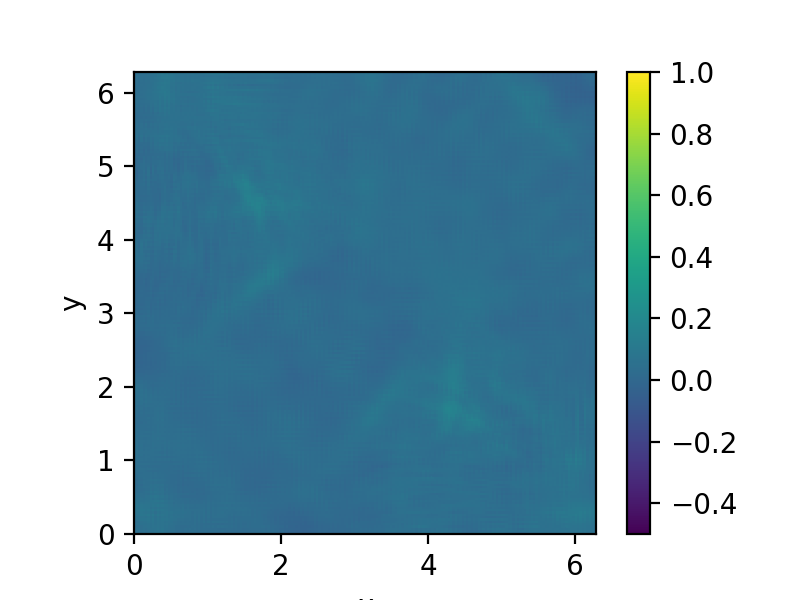

done


In [3]:
resolution=200
grid_x = field.UniformNonPeriodicGrid(resolution, (0,2*np.pi))
grid_y = field.UniformNonPeriodicGrid(resolution, (0,2*np.pi))
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

#BT = np.sin(x/2)*np.ones_like(y) +2
BT = np.sin(x)*np.sin(y) +2

IC = np.exp( - ( (x-np.pi/2)**2 + (y-np.pi/2)**2 )*2 )

#IC += np.exp( - ( (x-np.pi/2)**2 + (y-np.pi/2)**2 )*2 )

h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0.5
b = 0.5

alpha = 0.1

sw_problem=equationsBC.SWFullBC(X, 2, g, f,b,nu,H)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
pcm.set_clim([-0.5,1])
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 5 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        fig.canvas.draw()
print('done')

In [4]:
M=np.array([[1,2],[3,4]])

In [6]:
M[1,:]

array([3, 4])